In [1]:
#Imports
import sys
sys.path.append('../python/')
import NGC5533_functions as nf

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import lmfit as lm
import dataPython as dp

In [2]:
data = dp.getXYdata_wXYerr('data/NGC5533-rot-data_fmt.txt')
r_dat = np.asarray(data['xx'])
v_dat = np.asarray(data['yy'])
v_err0 = np.asarray(data['ex'])
v_err1 = np.asarray(data['ey'])

In [3]:
def f(r,M,rc,rho00,n,re,pref):
#def f(r,M,rc,rho00,c):
    return np.sqrt(nf.bh_v(r,M,load=True)**2 + nf.h_v(r,rc,rho00,load=True)**2 + nf.b_v(r,n,re,load=True)**2 + nf.d_v(r,pref,load=True)**2)

In [16]:
#Setup
weighdata = 1/v_err1
l_mod = lm.Model(f)
params = l_mod.make_params()
#Black Hole
params.add('M', value=nf.Mbh_def, min=0) #Mass
#Bulge
params.add('n', value=nf.n_c, min=0)
params.add('re', value=nf.re_c, min=0)
#Disk
params.add('pref', value=0.5, min=0)
#Halo
params.add('rc', value=nf.h_rc, min=0)   #Radius (magnitude)
params.add('rho00', value=nf.rho00_c, min=0) #Density (halo)

#Do fit
l_fit = l_mod.fit(v_dat,params,r=r_dat,weights=weighdata)

#Define Stuff
l_dict = l_fit.best_values
l_M = l_dict['M']
l_rc = l_dict['rc']
l_rho00 = l_dict['rho00']
l_pref = l_dict['pref']
l_n = l_dict['n']
l_re = l_dict['re']

Saved.


../python/NGC5533_functions.py:178: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return si.quad(f, m, np.inf,args=(m,n,re))[0]


Saved.
Saved.
Saved.
Saved.
Saved.
Saved.


../python/NGC5533_functions.py:184: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return si.quad(h, 0, r, args=(r,n,re))[0]


Saved.
Saved.
Saved.
Saved.
Saved.
Saved.
Saved.
Saved.
Saved.


In [17]:
#Create arrays for plotting
l_curve = f(r_dat,l_M,l_rc,l_rho00,l_n,l_re,l_pref)
    
b_curve = nf.b_v(r_dat,l_n,l_re,load=True)
d_curve = nf.d_v(r_dat,pref=l_pref,load=True) #Disk only
nodisk = np.sqrt(nf.bh_v(r_dat,l_M,load=True)**2 + nf.h_v(r_dat,l_rc,l_rho00,load=True)**2 + nf.b_v(r_dat,l_n,l_re,load=True)**2)

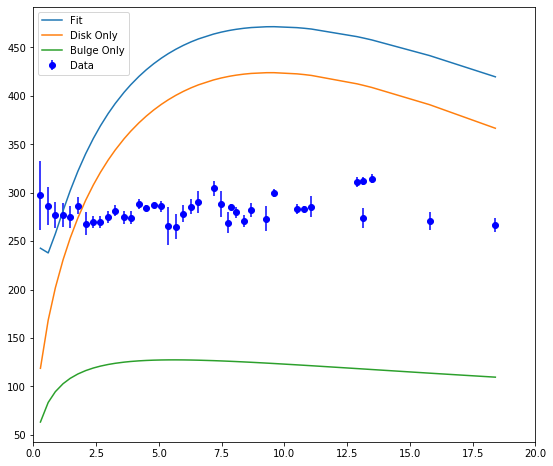

In [18]:
fig = plt.figure(figsize=(9.0,8.0))

plt.xlim(0,20)

plt.errorbar(r_dat,v_dat,yerr=v_err1,fmt='bo',label='Data')
plt.plot(r_dat,l_curve,label='Fit')
plt.plot(r_dat,d_curve,label='Disk Only')
#plt.plot(r_dat,nodisk,label='No Disk')
plt.plot(r_dat,b_curve,label='Bulge Only')

plt.legend()
plt.show()

l_fit

In [ ]:
print(nf.Mbh_def)